

## **Collaborative Filtering**

##### Membangun sebuah sistem rekomendasi yang berfokus pada prefrensi orang, dimana pada sistem rekomendasi ini digunakan kemiripan selera user dengan user untuk menentukan rekomendasi. Pada penelitian sebelumnya dimanfaatkan meta data dari sebuah anime yang menghasilkan rekomendasi berdasarkan meta data yang dimana menimbulkan permasalahan bilamana ada sebuah item yang serupa namun secara isi dan kenikmatan penonton tidak sama. 

##### Hal ini adalah sebuah fenomena organik yang tidak bisa didefinisikan dengan kata-kata namun dapat direalisasikan menggunakan collaborative filtering yang dimana kita dapat menghasilkan rekomendasi dari sebuah "keputusan mufakat" user lainnya. Penelitian ini mirip dengan basket analysis dimana bila pembeli A biasa memberi produk Z dan F maka setiap pembeli B yang membeli produk Z kemungkinan akan menyukai produk F.

In [3]:
import numpy as np
import pandas as pd

rating_df=pd.read_csv('user-filtered.csv')
rating_df.head(4)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


In [4]:
# User should rate atleast 400 animes
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

71418114

In [5]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.40477935891013467


In [6]:
# Removing Duplicated Rows
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 1 duplicates
> 0 duplicates


In [7]:
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,226,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,1.0,1.0,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0
50485,0.0,0.6,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,1.0,1.0,0.9,1.0,1.0,1.0,0.8
63900,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.8,0.8,0.8
68042,0.8,1.0,0.9,1.0,0.7,0.9,1.0,0.9,0.7,0.8,0.9,0.8,0.4,0.4,0.6,0.9,0.3,0.2,0.5,0.9
85472,0.7,0.0,0.0,1.0,0.9,0.9,0.0,0.0,1.0,0.0,0.8,0.0,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.9
92529,0.9,0.9,1.0,1.0,0.0,0.8,0.0,0.9,0.9,0.0,1.0,0.0,0.8,0.9,0.8,0.9,0.9,0.8,0.8,1.0
122341,0.2,0.3,0.2,0.7,0.4,0.3,0.3,0.8,0.5,0.6,0.7,0.3,0.2,0.1,0.3,0.1,0.4,0.4,0.2,0.6
131988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140590,0.3,0.6,0.5,0.8,0.6,0.8,0.8,0.9,0.5,0.8,0.9,0.7,0.3,0.4,0.6,0.5,0.7,0.7,0.5,0.7


## **Data Preprocessing**

In [8]:
# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 91641, Num of animes: 17560
Min rating: 0.0, Max rating: 1.0


In [9]:
# Shuffle
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'anime']].values
y = rating_df["rating"]

In [10]:
# Split
test_set_size = 10000 #10k for test set
train_indices = rating_df.shape[0] - test_set_size

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 71408113
> Test set ratings: 10000


In [11]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

## **Model Building**

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [20]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from tensorflow.keras.models import Model

def RecommenderNet():
    embedding_size = 128

    user = Input(name='user', shape=[1])
    user_embedding = Embedding(name='user_embedding',
                               input_dim=n_users,
                               output_dim=embedding_size)(user)

    anime = Input(name='anime', shape=[1])
    anime_embedding = Embedding(name='anime_embedding',
                                input_dim=n_animes,
                                output_dim=embedding_size)(anime)

    x = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    x = Flatten()(x)

    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)

    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')

    return model

model = RecommenderNet()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 anime (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       11730048    ['user[0][0]']                   
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       2247680     ['anime[0][0]']                  
                                                                                              

In [21]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

# If you're using TPU, you need to define TPU_INIT and tpu_strategy beforehand.
# For now, we will skip the TPU-related adjustments.
# You can set this flag to False if not using TPU
TPU_INIT = False

# If using TPU, adjust learning rate and batch size
if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay ** (epoch - rampup_epochs - sustain_epochs) + min_lr

lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                     save_weights_only=True,
                                     monitor='val_loss',
                                     mode='min',
                                     save_best_only=True)

early_stopping = EarlyStopping(patience=3, monitor='val_loss',
                               mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,
]


In [22]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

2024-10-14 13:03:29.388213: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
7141/7141 [==============================] - 466s 65ms/step - loss: 0.7921 - mae: 0.3827 - mse: 0.1960 - val_loss: 0.7832 - val_mae: 0.3830 - val_mse: 0.1945 - lr: 1.0000e-05
Epoch 2/20
7141/7141 [==============================] - 390s 55ms/step - loss: 0.7535 - mae: 0.3718 - mse: 0.1811 - val_loss: 0.7248 - val_mae: 0.3635 - val_mse: 0.1709 - lr: 1.8000e-05
Epoch 3/20
7141/7141 [==============================] - 442s 62ms/step - loss: 0.6334 - mae: 0.3135 - mse: 0.1291 - val_loss: 0.5907 - val_mae: 0.2904 - val_mse: 0.1121 - lr: 2.6000e-05
Epoch 4/20
7141/7141 [==============================] - 504s 71ms/step - loss: 0.5583 - mae: 0.2633 - mse: 0.0971 - val_loss: 0.5492 - val_mae: 0.2564 - val_mse: 0.0953 - lr: 3.4000e-05
Epoch 5/20
7141/7141 [==============================] - 456s 64ms/step - loss: 0.5260 - mae: 0.2340 - mse: 0.0850 - val_loss: 0.5243 - val_mae: 0.2312 - val_mse: 0.0860 - lr: 4.2000e-05
Epoch 6/20
7141/7141 [==============================] - 415s 58ms/step

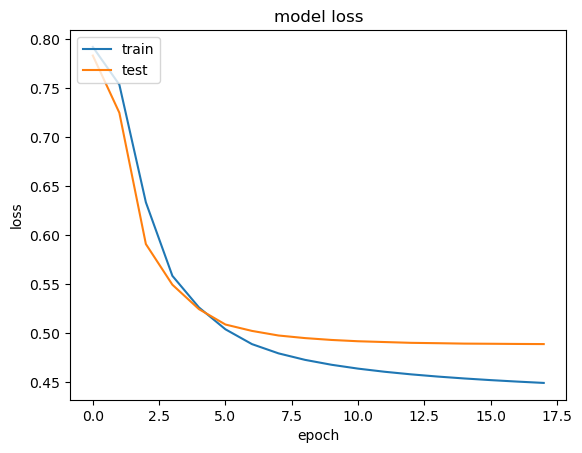

In [23]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## **Extracting weights from model**

In [24]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

### **Fetching Meta Data**

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('anime-dataset-2023.csv')


In [37]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if pd.isna(name):
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print(f'Error: anime_id {anime_id} not found')

    return name

# Mapping 'English name' column to 'eng_version'
df['eng_version'] = df['English name']

# Applying the getAnimeName function to fill in missing English names
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

# Sorting by 'Score'
df.sort_values(by=['Score'], inplace=True, ascending=False, kind='quicksort', na_position='last')

# Keeping only relevant columns
df = df[["anime_id", "eng_version", "Score", "Genres", "Episodes", "Type", "Premiered", "Members"]]

In [39]:
# Function to retrieve anime details by anime_id or English name
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]



### **sypnopsis data**

In [40]:
# Fixing the typo in 'Synopsis' column name
cols = ["anime_id", "Name", "Genres", "Synopsis"]
sypnopsis_df = pd.read_csv('anime-dataset-2023.csv')

# Function to retrieve the synopsis of an anime
def getSynopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.anime_id == anime].Synopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].Synopsis.values[0]



## **Item Based Recommendation**

In [41]:
# Ensure columns are fully displayed
pd.set_option("max_colwidth", None)

# Function to find similar animes
def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        # Retrieve the anime_id of the given anime
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights

        # Compute similarity distances
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print(f'Animes closest to {name}')

        if return_dist:
            return dists, closest

        SimilarityArr = []

        # Fetch details for each closest anime
        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            synopsis = getSynopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)

            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity, "genre": genre,
                                  'synopsis': synopsis})

        # Return sorted DataFrame without the original anime_id
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print(f'{name} not found in Anime list!')

### **Running Prediction**

In [75]:
find_similar_animes('Steins;Gate', n=5, neg=False)

Animes closest to Steins;Gate


,name,similarity,genre,synopsis
4,Code Geass: Lelouch of the Rebellion R2,0.703554,"Action, Award Winning, Drama, Sci-Fi","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. \n\nLelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
3,Code Geass: Lelouch of the Rebellion,0.693180,"Action, Award Winning, Drama, Sci-Fi","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with the conquest of Japan. Renamed to Area 11 after its swift defeat, Japan has seen significant resistance against these tyrants in an attempt to regain independence.\n\nLelouch Lamperouge, a Britannian student, unfortunately finds himself caught in a crossfire between the Britannian and the Area 11 rebel armed forces. He is able to escape, however, thanks to the timely appearance of a mysterious girl named C.C., who bestows upon him Geass, the ""Power of Kings."" Realizing the vast potential of his newfound ""power of absolute obedience,"" Lelouch embarks upon a perilous journey as the masked vigilante known as Zero, leading a merciless onslaught against Britannia in order to get revenge once and for all."
2,Fullmetal Alchemist: Brotherhood,0.691668,"Action, Adventure, Drama, Fantasy","After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio-mechanical engineering prodigy, Winry creates prosthetic limbs for Edward by utilizing ""automail,"" a tough, versatile metal used in robots and combat armor. After years of training, the Elric brothers set off on a quest to restore their bodies by locating the Philosopher's Stone—a powerful gem that allows an alchemist to defy the traditional laws of Equivalent Exchange.\n\nAs Edward becomes an infamous alchemist and gains the nickname ""Fullmetal,"" the boys' journey embroils them in a growing conspiracy that threatens the fate of the world."
1,Angel Beats!,0.680829,"Drama, Supernatural","Death is one of many mysteries that has left humanity in the dark since the dawn of time. However, the burning question of what happens to the soul after one dies is soon answered to 17-year-old Yuzuru Otonashi. Waking up with no previous memories in a dimension between life and death, he discovers the unsettling truth of the afterlife. \n\nTaking the form of a high school, this bizarre dimension is designated to shelter those who died unwanted deaths. Feeling wronged by God during their earthly lives, the school's residents have decided to form the Afterlife Battlefront—a rebellious faction determined to oppose their god-like student council president, Kanade ""Angel"" Tachibana. The group's leader, Yuri Nakamura, recruits Otonashi in their fight against Angel in order to take control of their own lives. However, questioning the morality behind their 

## **User Based Recommendation**

In [76]:
print('> picking up random user')

ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user
> user_id: 313286


In [77]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights

        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest

        rindex = df
        SimilarityArr = []

        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id,
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity",
                                                        ascending=False)

        return Frame

    except:
        print('{}!, Not Found in User list'.format(name))

In [78]:
similar_users = find_similar_users(int(random_user),
                                   n=5,
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #313286


,similar_users,similarity
4,4432,0.444527
3,174236,0.443744
2,19419,0.439468
1,133601,0.433809
0,249549,0.421406


## **User preferences**

In [80]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [81]:
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400,
                             background_color='white',
                             colormap='gnuplot').generate_from_frequencies(all_genres)

    plt.figure(figsize=(10,8))
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def getFavGenre(frame, plot=False):
        frame.dropna(inplace=False)
        all_genres = defaultdict(int)

        genres_list = []
        for genres in frame['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre)
                    all_genres[genre.strip()] += 1
        if plot:
            showWordCloud(all_genres)

        return genres_list


def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
        .anime_id.values
    )

    anime_df_rows = df[df["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["eng_version", "Genres"]]

    if verbose != 0:
        print("> User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(animes_watched_by_user),
          animes_watched_by_user['rating'].mean(),
        ))

        print('> preferred genres')

    if plot:
        getFavGenre(anime_df_rows, plot)

    return anime_df_rows#.eng_version.values

> User #313286 has rated 104 movies (avg. rating = 0.8)
> preferred genres


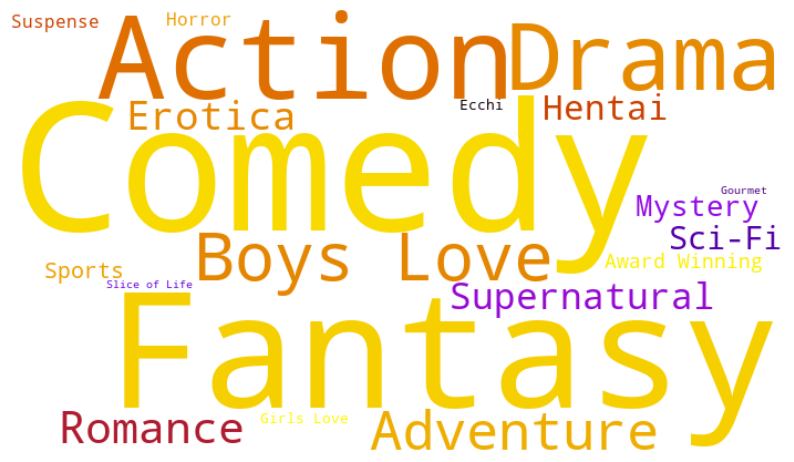

> animes highly rated by this user


,eng_version,Genres
176,Spirited Away,"Adventure, Award Winning, Supernatural"
142,Princess Mononoke,"Action, Adventure, Award Winning, Fantasy"
1103,Welcome to the N.H.K.,"Comedy, Drama, Romance"
4715,Durarara!!,"Action, Mystery, Supernatural"
7146,Kamisama Kiss,"Comedy, Fantasy, Romance"


In [82]:
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
print('> animes highly rated by this user')

pd.DataFrame(user_pref).head(5)